In [80]:
import numpy as np
from PIL import Image 
import string
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
import base64
from sklearn.cluster import KMeans
import multiprocessing
import IPython

In [64]:
cpu_threads=max(1,multiprocessing.cpu_count()-1)
cpu_threads

23

RGB (640, 640)


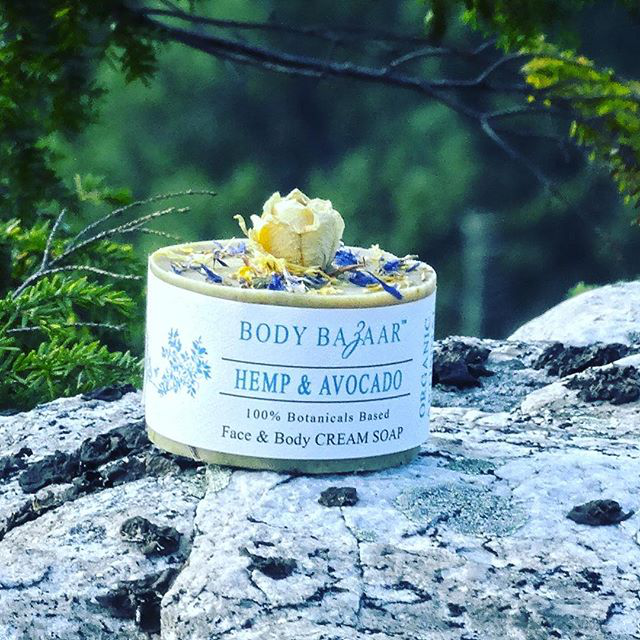

In [40]:
img=Image.open('image1.jpg')
pix=img.load()
print(img.mode, img.size)

img

### Pallet size

In [41]:
palet_len=30

Cluster the image data

In [96]:
kmean=KMeans(palet_len, n_jobs=20)

# copy pixel data
data = np.asarray(img.getdata())

# fix the kmean
kmean.fit(data)

# assig each pixel to cluster
imgclust=kmean.predict(data)

# reshape data for easier access in copy process

Pixels 3D chart compressed image


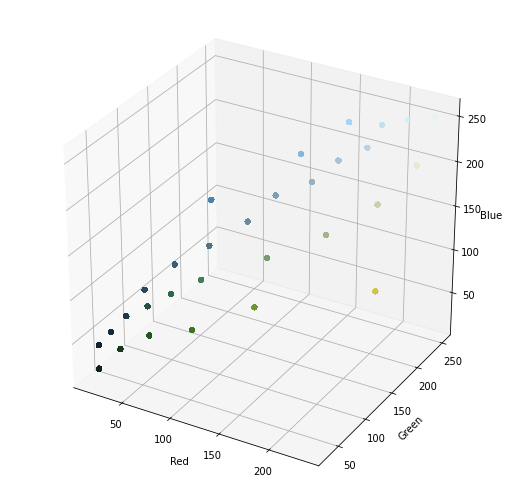

In [114]:
def treed__pixel_chart(data, text, alpha=0.1):
    print(text)
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], alpha=alpha, color=data/255.0)

    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')
    plt.show()
    
treed__pixel_chart(np.take(palette, imgclust, axis=0), 'Pixels 3D chart compressed image', alpha=0.1)

In [42]:
imgclust=imgclust.reshape((img.size[1],img.size[0]))
imgclust

array([[ 7,  7,  7, ...,  7,  7, 25],
       [ 7,  7,  7, ...,  7,  7, 25],
       [ 7,  7,  7, ...,  7, 25, 25],
       ...,
       [ 8, 29, 15, ..., 22,  5,  5],
       [11, 29, 29, ..., 25,  1,  9],
       [ 0, 28,  8, ..., 13,  2, 21]], dtype=int32)

### Create Palette

In [43]:
palette=np.vectorize(int)(kmean.cluster_centers_)

palette=[tuple(p)for p in palette]

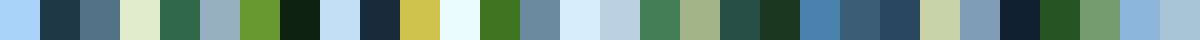

In [44]:
palette_height=40

img_palette=Image.new(img.mode, (palet_len*palette_height, palette_height))
pix_palette=img_palette.load()

for x in range(img_palette.size[0]):
    for y in range(img_palette.size[1]):
        pix_palette[x,y]=palette[x//palette_height]

img_palette

### Compressed Image

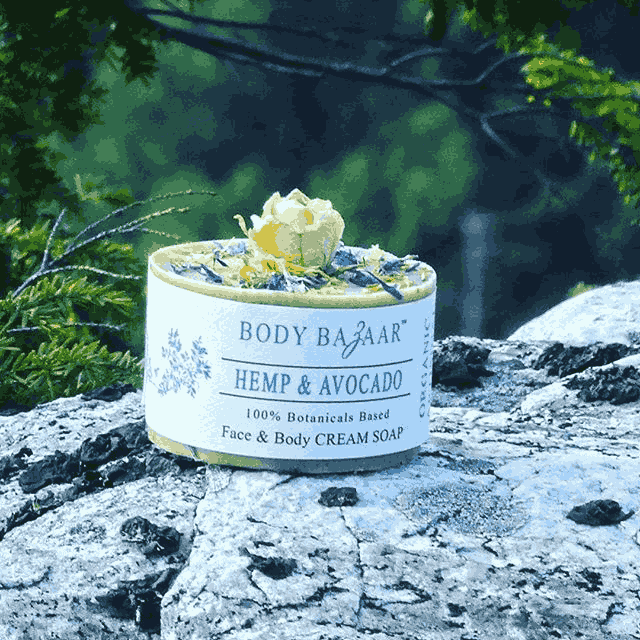

In [45]:
for x in range(img.size[0]):
    for y in range(img.size[1]):
        pix[x,y]=palette[imgclust[y][x]]


img

In [135]:
print(not True)

False


In [136]:
def compress_image(path, palet_len=10, skip_3d_original=False):
    img=Image.open(path)
    pix=img.load()
    print(img.mode, img.size)

    kmean=KMeans(palet_len, n_jobs=cpu_threads)

    # copy pixel data
    data = np.asarray(img.getdata())

    

    if not skip_3d_original:
        treed__pixel_chart(data, 'Pixels 3D chart original image', alpha=0.1)
    
    print("fitting model")
    # fix the kmean
    kmean.fit(data)
    
    # getting pallete from KMean
    palette=np.vectorize(int)(kmean.cluster_centers_)

    print("compressing the image")
    # assig each pixel to cluster
    imgclust=kmean.predict(data)

    # reshape data for easier access in copy process
    treed__pixel_chart(np.take(palette, imgclust, axis=0), 'Pixels 3D chart compressed image', alpha=0.1)

    imgclust=imgclust.reshape((img.size[1],img.size[0]))
    palette=[tuple(p)for p in palette]

    palette_height=40

    img_palette=Image.new(img.mode, (palet_len*palette_height, palette_height))
    pix_palette=img_palette.load()

    for x in range(img_palette.size[0]):
        for y in range(img_palette.size[1]):
            pix_palette[x,y]=palette[x//palette_height]
    print("Pallete")
    IPython.display.display(img_palette)
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            pix[x,y]=palette[imgclust[y][x]]


    return img

### Original Images
![Original](image1.jpg)


RGB (640, 640)
Pixels 3D chart original image


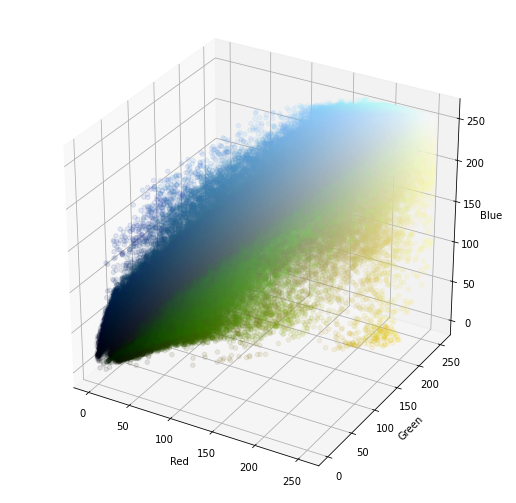

fitting model
compressing the image
Pixels 3D chart compressed image


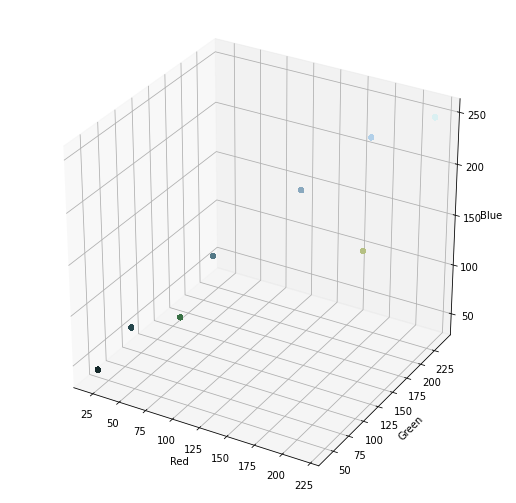

Pallete


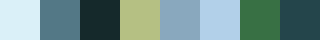

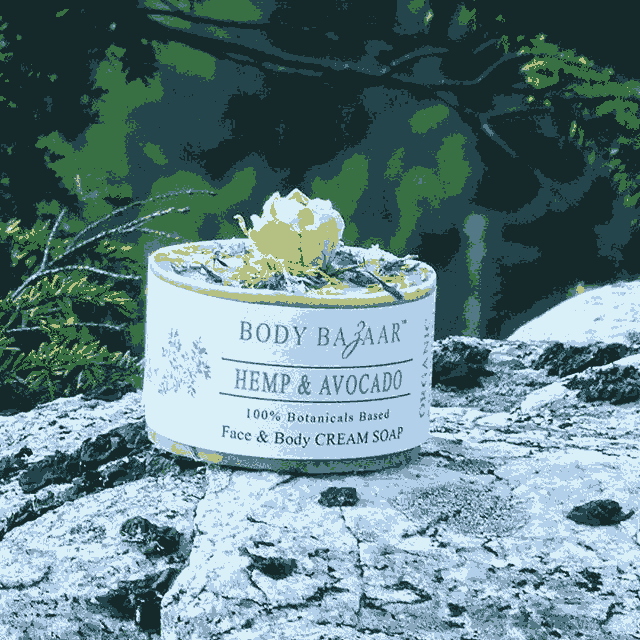

In [137]:
compress_image("image1.jpg", 8)

RGB (640, 640)
fitting model
compressing the image
Pixels 3D chart compressed image


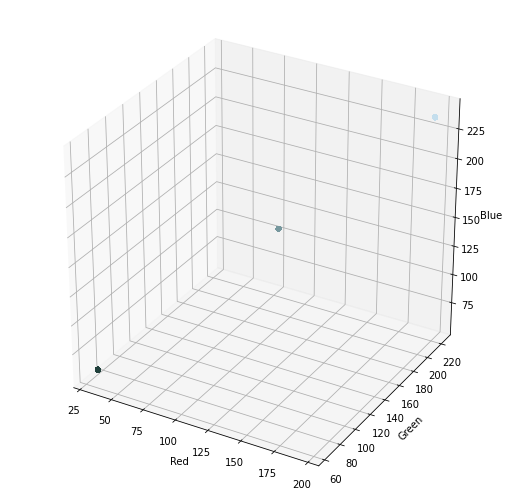

Pallete


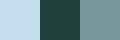

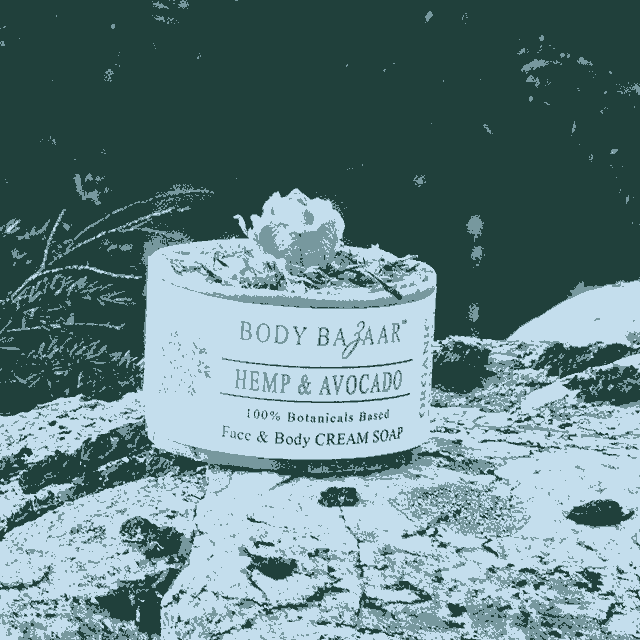

In [138]:
compress_image("image1.jpg", 3, skip_3d_original=True)

### Original Images 2
![Original](image2.jpg)


RGB (640, 640)
Pixels 3D chart original image


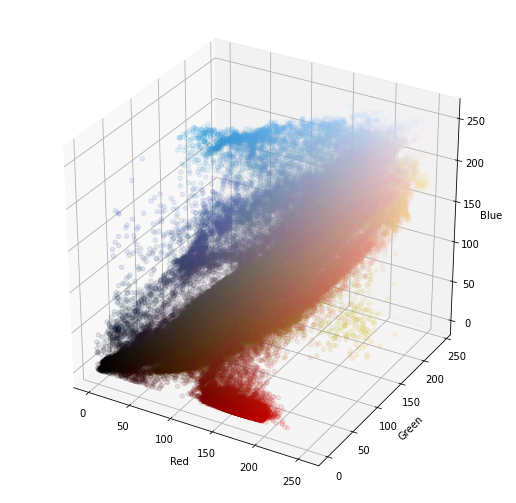

fitting model
compressing the image
Pixels 3D chart compressed image


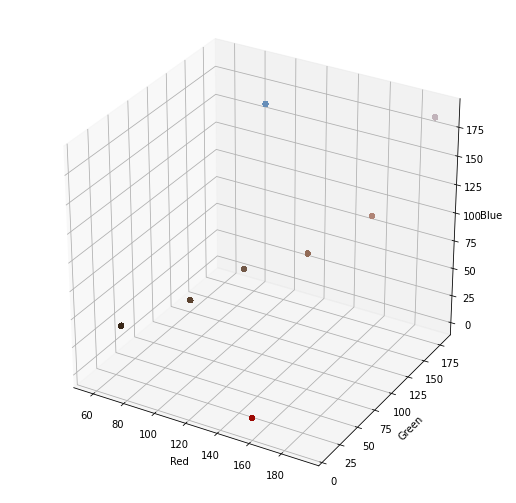

Pallete


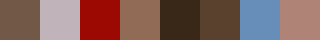

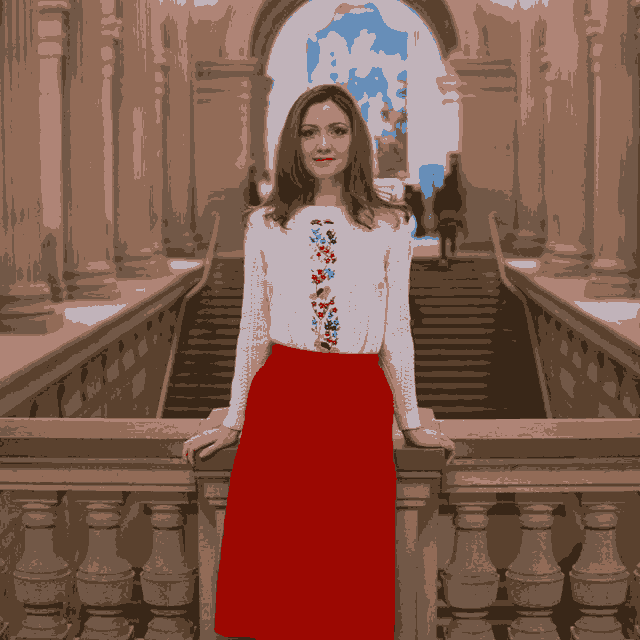

In [153]:
compress_image("image2.jpg", 8)

RGB (640, 640)
fitting model
compressing the image
Pixels 3D chart compressed image


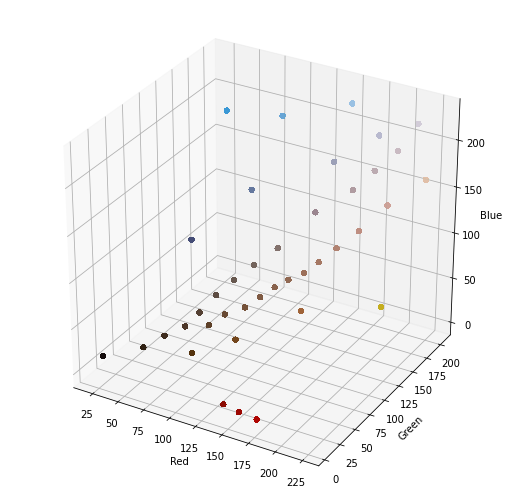

Pallete


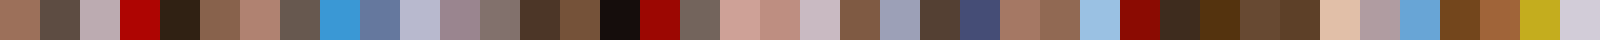

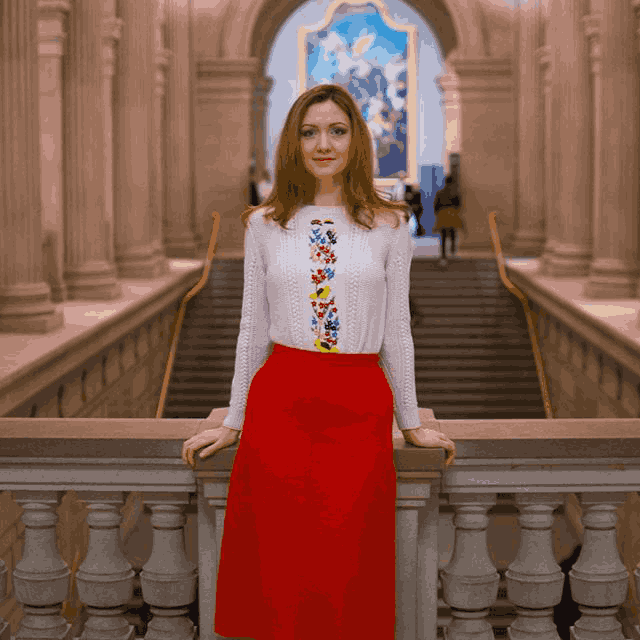

In [148]:
compress_image("image2.jpg", 40, skip_3d_original=True)

### Original Images 3
![Original](image3.jpg)


RGB (640, 640)
Pixels 3D chart original image


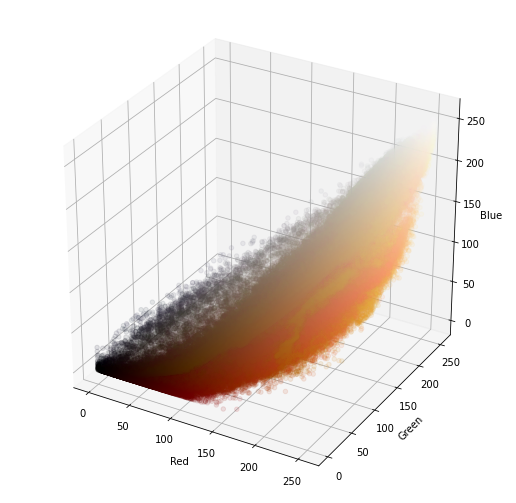

fitting model
compressing the image
Pixels 3D chart compressed image


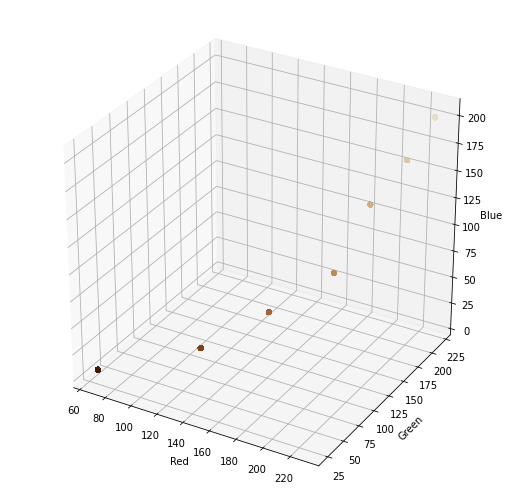

Pallete


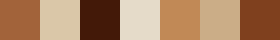

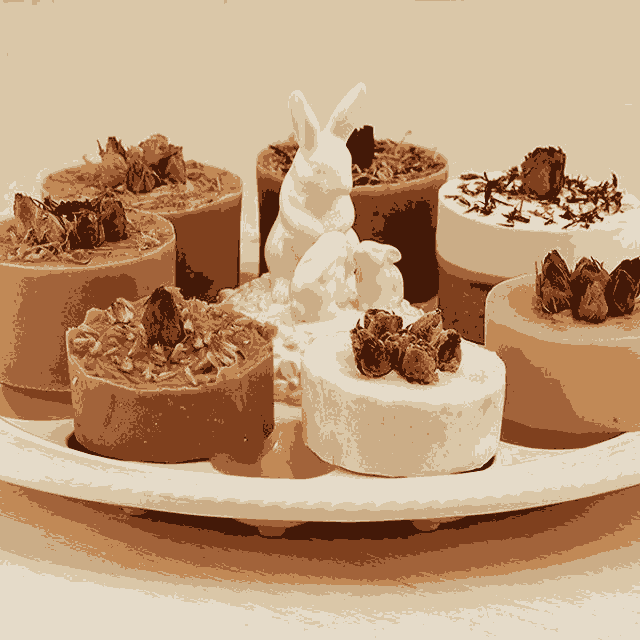

In [142]:
compress_image("image3.jpg", 7)

RGB (640, 640)
fitting model
compressing the image
Pixels 3D chart compressed image


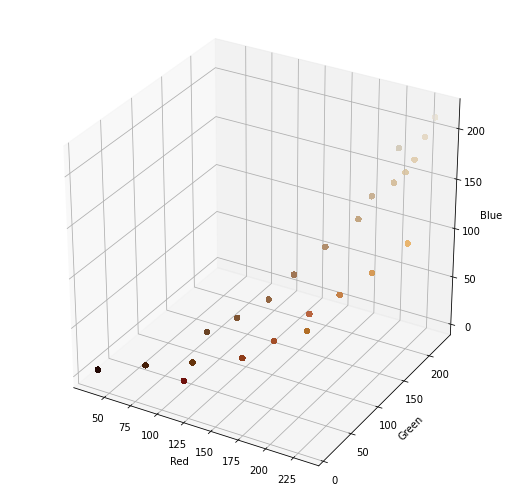

Pallete


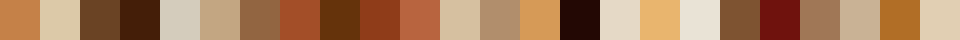

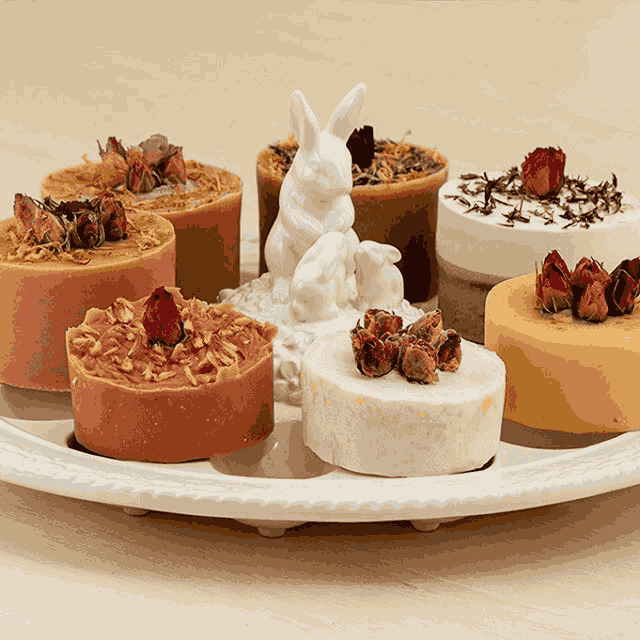

In [143]:
compress_image("image3.jpg", 24, skip_3d_original=True)

RGB (640, 640)
fitting model
compressing the image
Pixels 3D chart compressed image


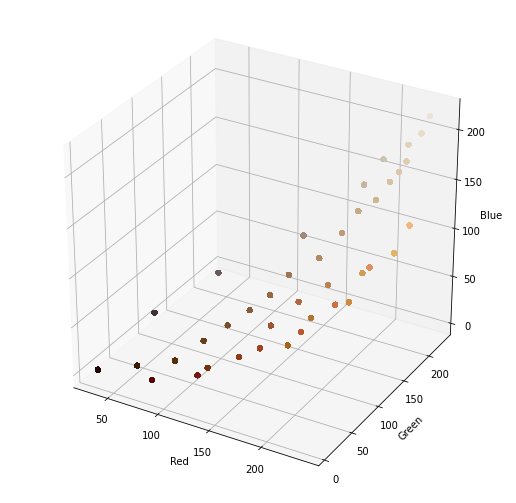

Pallete


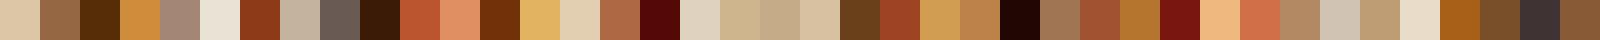

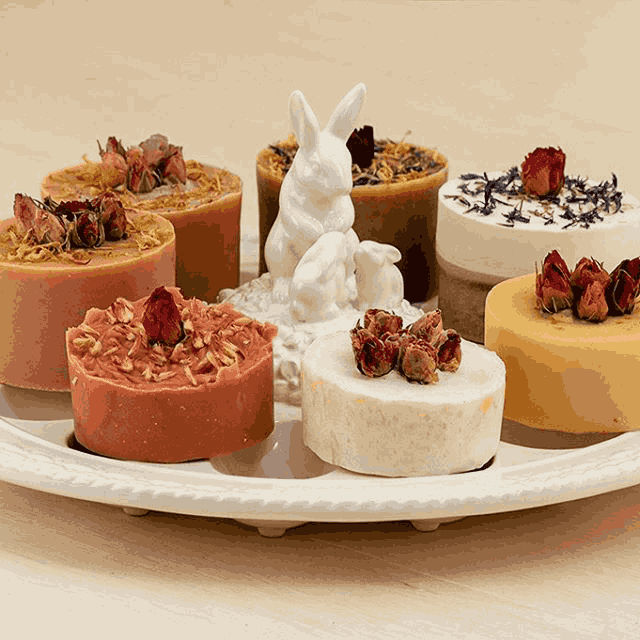

In [144]:
compress_image("image3.jpg", 40, skip_3d_original=True)

### Original Images

sRGB (standard Red Green Blue) is an RGB color space that HP and Microsoft created cooperatively in 1996 to use on monitors, printers, and the Web. It was subsequently standardized by the IEC as IEC 61966-2-1:1999.[1] It is often the "default" color space for images that contain no color space information, especially if the images' pixels are stored in 8-bit integers per color channel.


![Original](image4.png)


RGB (870, 972)
Pixels 3D chart original image


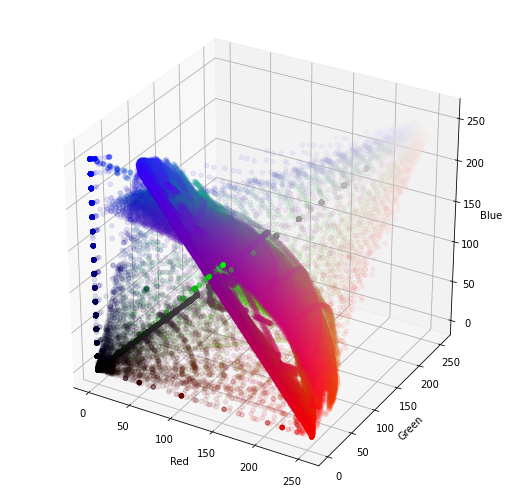

fitting model
compressing the image
Pixels 3D chart compressed image


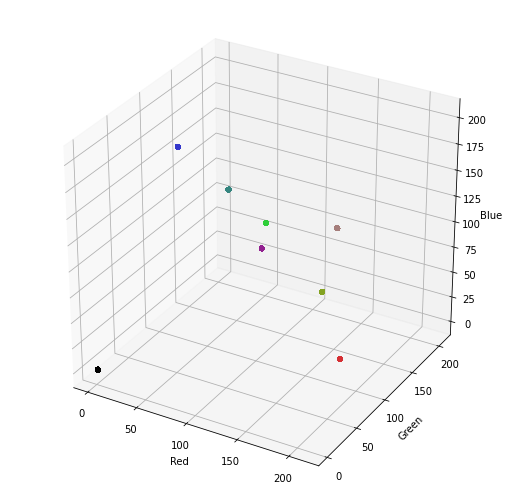

Pallete


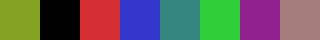

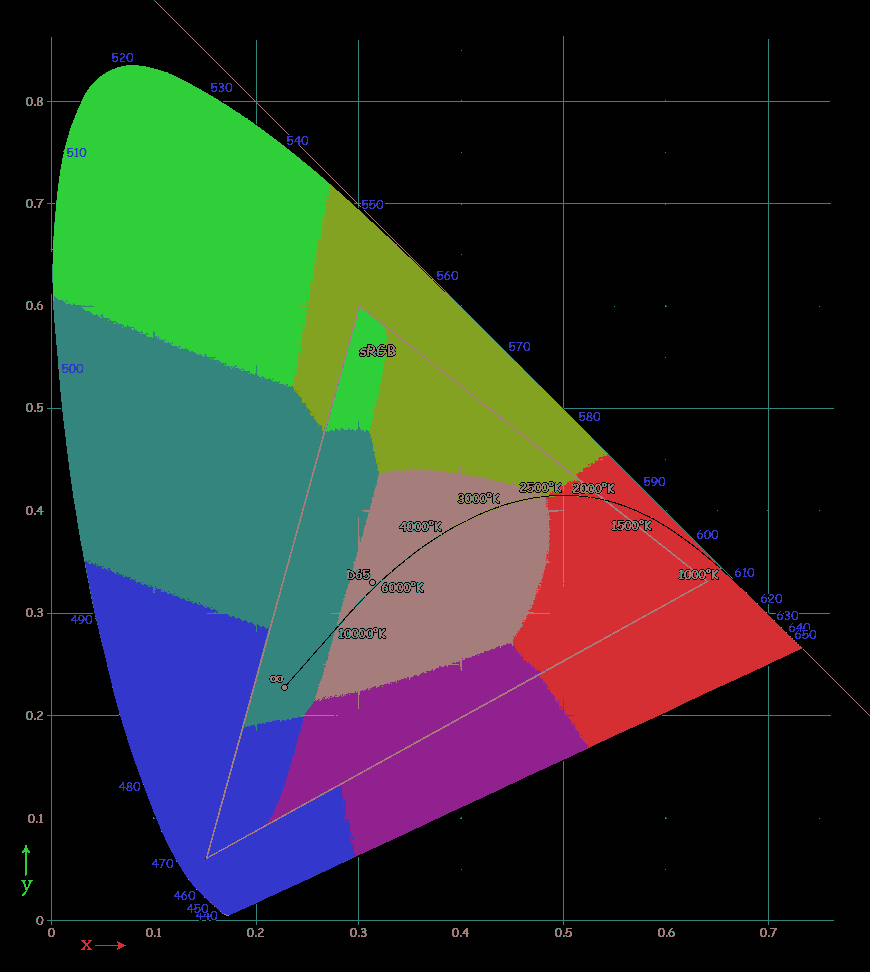

In [145]:
compress_image("image4.png", 8)

RGB (870, 972)
fitting model
compressing the image
Pixels 3D chart compressed image


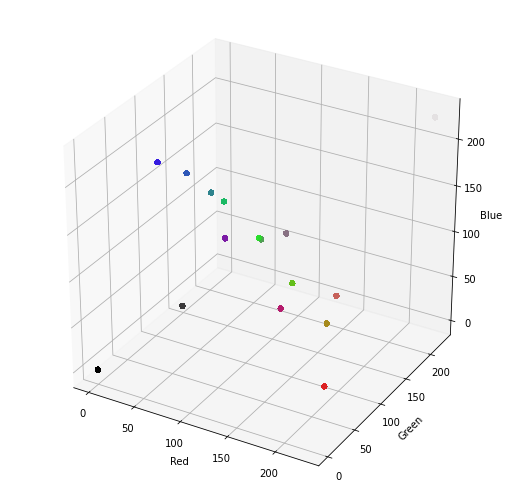

Pallete


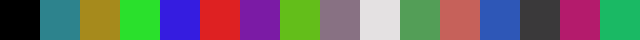

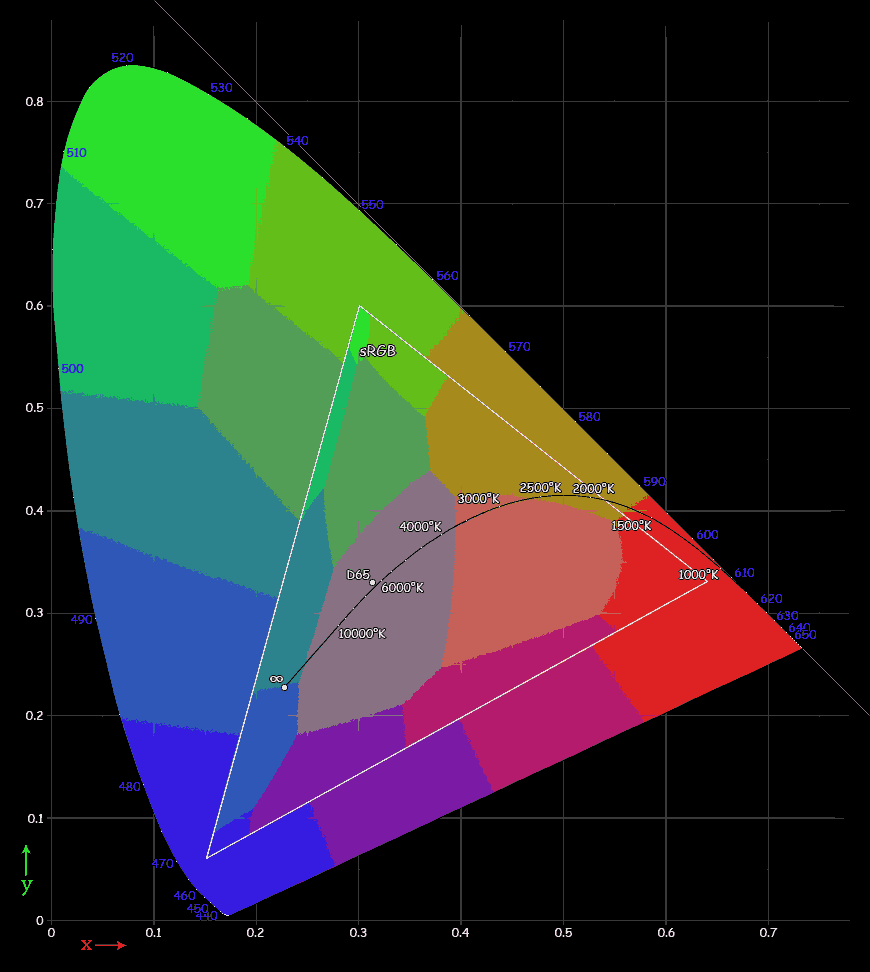

In [149]:
compress_image("image4.png", 16, skip_3d_original=True)

RGB (870, 972)
fitting model
compressing the image
Pixels 3D chart compressed image


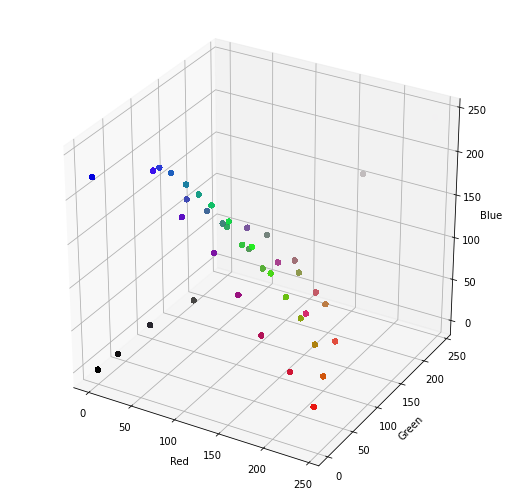

Pallete


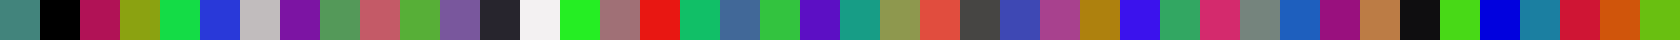

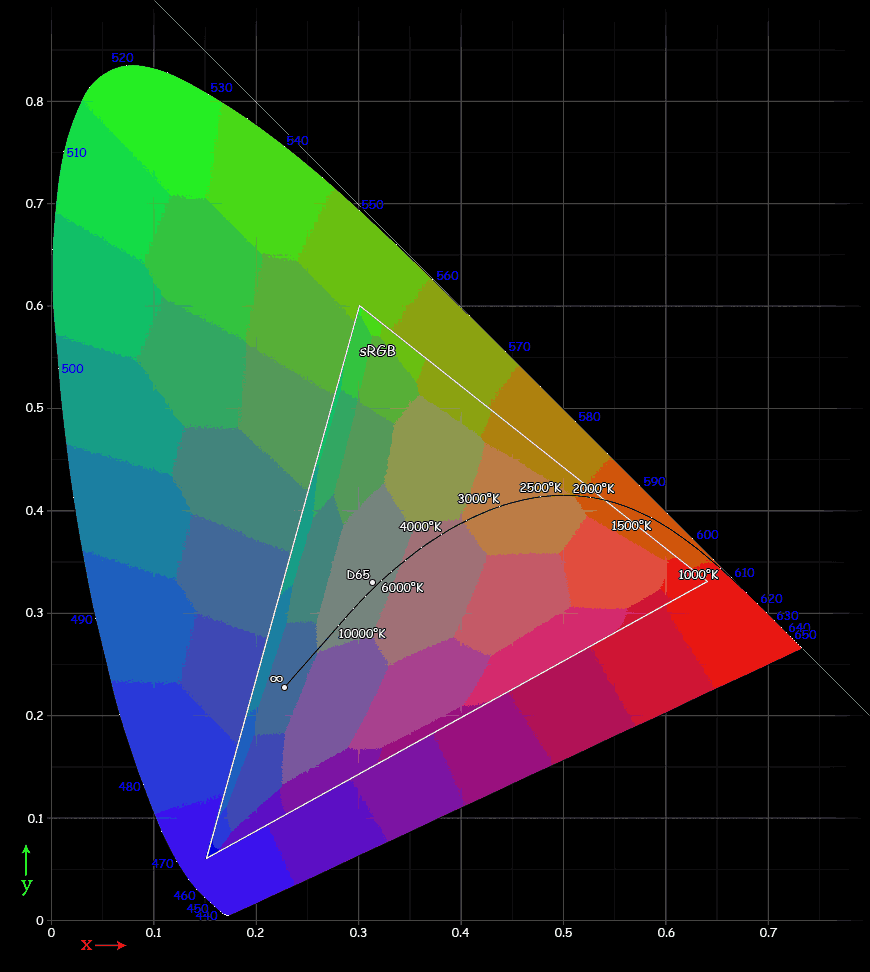

In [150]:
compress_image("image4.png", 42, skip_3d_original=True)

RGB (870, 972)
fitting model
compressing the image
Pixels 3D chart compressed image


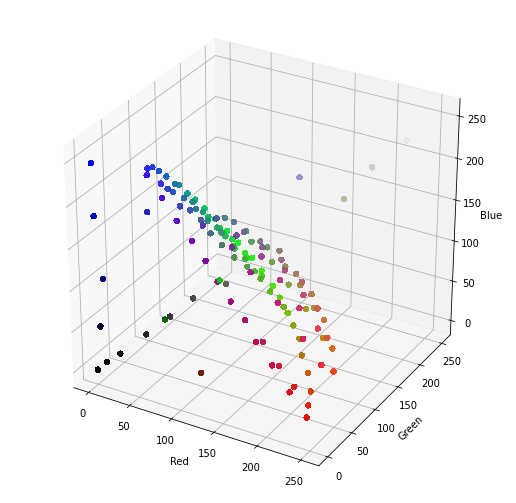

Pallete


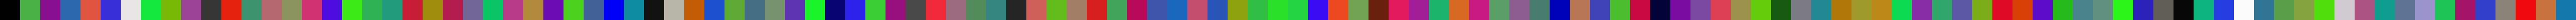

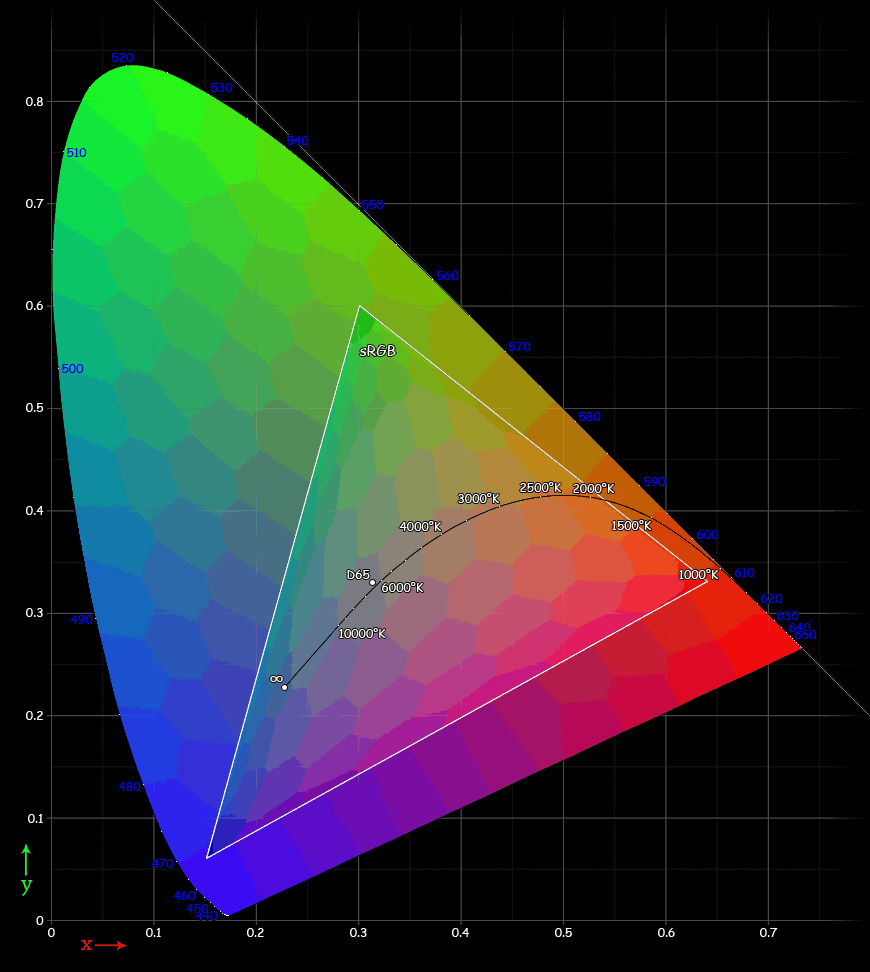

In [151]:
compress_image("image4.png", 128, skip_3d_original=True)

RGB (720, 342)
Pixels 3D chart original image


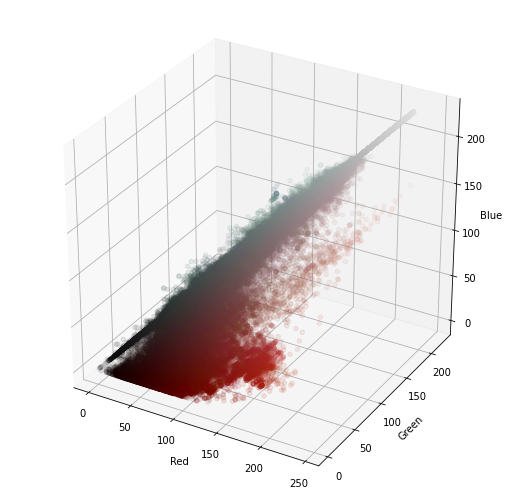

fitting model
compressing the image
Pixels 3D chart compressed image


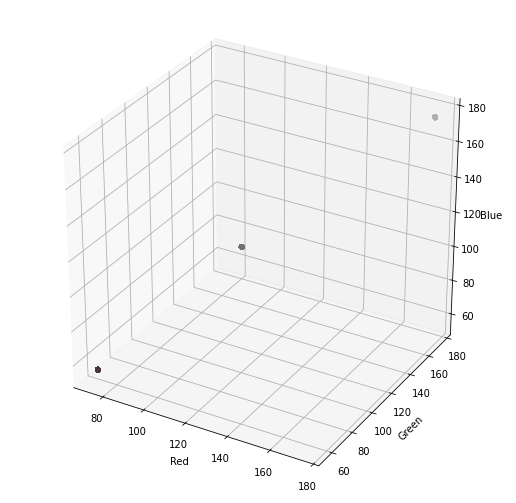

Pallete


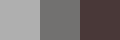

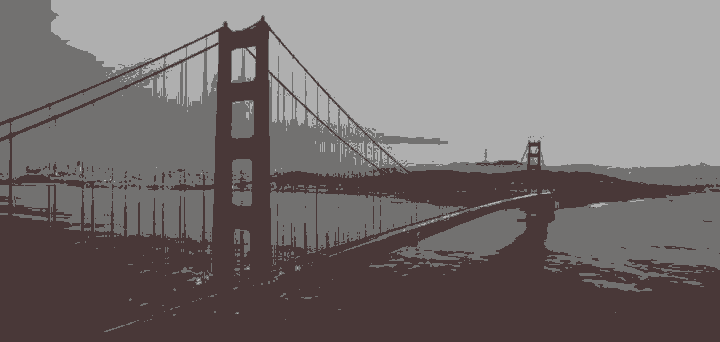

In [156]:
compress_image("image5.jpg", 3)

RGB (720, 342)
fitting model
compressing the image
Pixels 3D chart compressed image


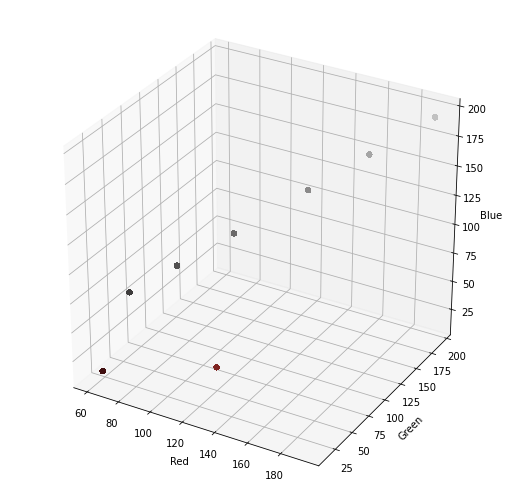

Pallete


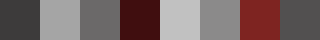

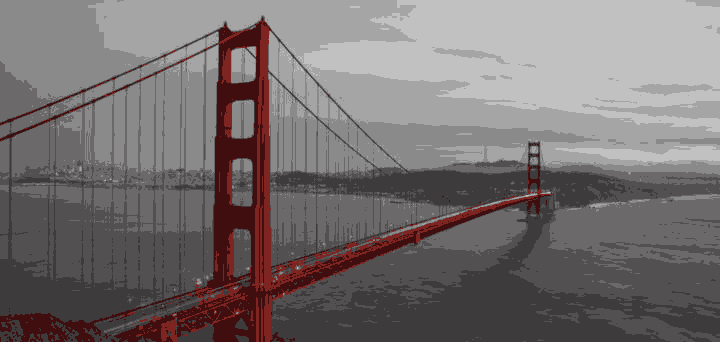

In [158]:
compress_image("image5.jpg", 8, skip_3d_original=True)

RGB (720, 342)
fitting model
compressing the image
Pixels 3D chart compressed image


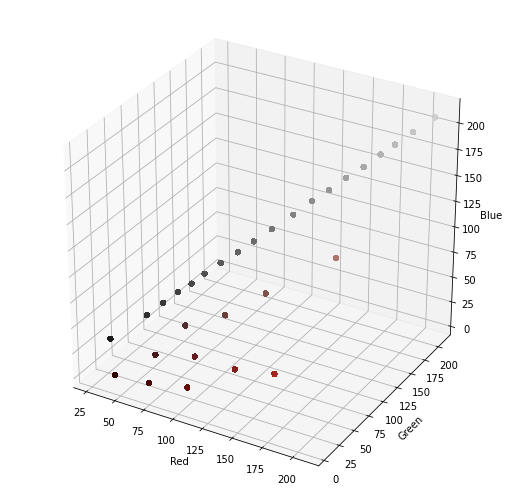

Pallete


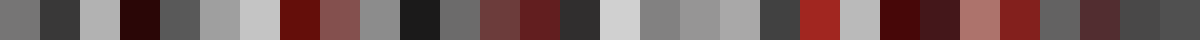

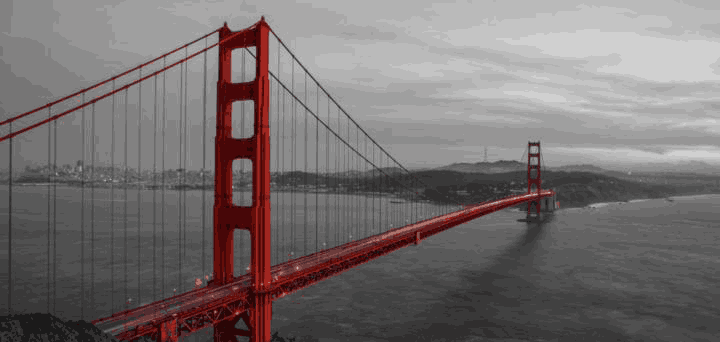

In [159]:
compress_image("image5.jpg", 30, skip_3d_original=True)